Metode Supervised

In [1]:
# supervised_learning_random_forest.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
# Ensure the Google Sheets document is shared publicly and use the appropriate CSV export link
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRwXLbV0s5_OA7jQILyGCAhDXwJHrQM2FzUcEUhIrwLCKRcgo5aCTMhaNnaMIzXKA/pub?output=csv'
series = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Ensure the index is a DatetimeIndex
series.index = pd.to_datetime(series.index)

# Convert the index to a PeriodIndex
series.index = series.index.to_period('M')
series = series.squeeze()

# Prepare the data
X = np.array(range(len(series))).reshape(-1, 1)  # Time periods as features
y = series.values  # Passenger counts

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()

<ipython-input-1-f9f3db9d4dad>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_csv(url, header=0, index_col=0, parse_dates=True)


Metode Unsupervised

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


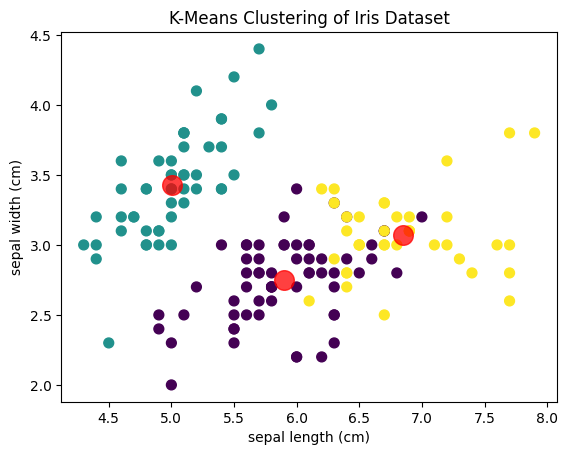

In [2]:
# unsupervised_learning.py
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering of Iris Dataset')
plt.show()